## Build ACNet 

In [2]:
import sys, os
import math
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage
import h5py
from PIL import Image

In [3]:
# Define the ACNet model
def model(input_shape, upscale_factor=4):
    
    """
    :param input_shape: [1024, 512, 3]
    :param output_shape: [1024, 512, 3]
    :return:
    """
    input = tf.keras.layers.Input(shape=(input_shape[0], input_shape[1], input_shape[2]))
    
    layer1_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     input_shape=(None, None, 3),
                                     kernel_initializer='glorot_uniform'
                                     )(input)
    layer1_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 input_shape=(None, None, 3),
                                 kernel_initializer='glorot_uniform'
                                 )(input)
    layer1_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             input_shape=(None, None, 3),
                             kernel_initializer='glorot_uniform'
                             )(input)
    layer1_add = tf.keras.layers.Add()([layer1_1,layer1_2,layer1_3])
    
    layer_ReLU1 = tf.keras.activations.relu(layer1_add)
    
    layer2_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU1)
    layer2_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU1)
    layer2_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU1)

    layer2_add = tf.keras.layers.Add()([layer2_1,layer2_2,layer2_3])
    
    layer_ReLU2 = tf.keras.activations.relu(layer2_add)
    
    layer3_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU2)
    layer3_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU2)
    layer3_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU2)

    layer3_add = tf.keras.layers.Add()([layer3_1,layer3_2,layer3_3])
    
    layer_ReLU3 = tf.keras.activations.relu(layer3_add)
    
    layer4_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU3)
    layer4_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU3)
    layer4_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU3)

    layer4_add = tf.keras.layers.Add()([layer4_1,layer4_2,layer4_3])
    
    layer_ReLU4 = tf.keras.activations.relu(layer4_add)
    
    layer5_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU4)
    layer5_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU4)
    layer5_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU4)

    layer5_add = tf.keras.layers.Add()([layer5_1,layer5_2,layer5_3])
    
    layer_ReLU5 = tf.keras.activations.relu(layer5_add)
    
    layer6_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU5)
    layer6_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU5)
    layer6_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU5)

    layer6_add = tf.keras.layers.Add()([layer6_1,layer6_2,layer6_3])
    
    layer_ReLU6 = tf.keras.activations.relu(layer6_add)
    
    layer7_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU6)
    layer7_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU6)
    layer7_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU6)

    layer7_add = tf.keras.layers.Add()([layer7_1,layer7_2,layer7_3])
    
    layer_ReLU7 = tf.keras.activations.relu(layer7_add)
    
    layer8_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU7)
    layer8_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU7)
    layer8_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU7)

    layer8_add = tf.keras.layers.Add()([layer8_1,layer8_2,layer8_3])
    
    layer_ReLU8 = tf.keras.activations.relu(layer8_add)
    
    layer9_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU8)
    layer9_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU8)
    layer9_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU8)

    layer9_add = tf.keras.layers.Add()([layer9_1,layer9_2,layer9_3])
    
    layer_ReLU9 = tf.keras.activations.relu(layer9_add)
    
    layer10_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU9)
    layer10_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU9)
    layer10_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU9)

    layer10_add = tf.keras.layers.Add()([layer10_1,layer10_2,layer10_3])
    
    layer_ReLU10 = tf.keras.activations.relu(layer10_add)
    
    layer11_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU10)
    layer11_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU10)
    layer11_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU10)

    layer11_add = tf.keras.layers.Add()([layer11_1,layer11_2,layer11_3])
    
    layer_ReLU11 = tf.keras.activations.relu(layer11_add)

    layer12_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU11)
    layer12_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU11)
    layer12_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU11)

    layer12_add = tf.keras.layers.Add()([layer12_1,layer12_2,layer12_3])
    
    layer_ReLU12 = tf.keras.activations.relu(layer12_add)
    
    layer13_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU12)
    layer13_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU12)
    layer13_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU12)

    layer13_add = tf.keras.layers.Add()([layer13_1,layer13_2,layer13_3])
    
    layer_ReLU13 = tf.keras.activations.relu(layer13_add)
    
    layer14_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU13)
    layer14_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU13)
    layer14_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU13)

    layer14_add = tf.keras.layers.Add()([layer14_1,layer14_2,layer14_3])
    
    layer_ReLU14 = tf.keras.activations.relu(layer14_add)
    
    layer15_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU14)
    layer15_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU14)
    layer15_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU14)

    layer15_add = tf.keras.layers.Add()([layer15_1,layer15_2,layer15_3])
    
    layer_ReLU15 = tf.keras.activations.relu(layer15_add)
    
    layer16_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU15)
    layer16_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU15)
    layer16_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU15)

    layer16_add = tf.keras.layers.Add()([layer16_1,layer16_2,layer16_3])
    
    layer_ReLU16 = tf.keras.activations.relu(layer16_add)
    
    layer17_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3),
                                     strides = 1,
                                     padding='same',
                                     use_bias=False,
                                     kernel_initializer='glorot_uniform'
                                     )(layer_ReLU16)
    layer17_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform'
                                 )(layer_ReLU16)
    layer17_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                             strides = 1,
                             padding='same',
                             use_bias=False,
                             kernel_initializer='glorot_uniform'
                             )(layer_ReLU16)

    layer17_add = tf.keras.layers.Add()([layer17_1,layer17_2,layer17_3])
    
    layer_ReLU17 = tf.keras.activations.relu(layer17_add)
    
    layer_reslearn = tf.keras.layers.Add()([layer1_add,layer2_add,layer3_add,layer4_add,layer5_add,layer6_add,layer7_add,layer8_add,layer9_add,layer10_add,
                                           layer11_add,layer12_add,layer13_add,layer14_add,layer15_add,layer16_add,layer17_add])
    
    branch1 = tf.keras.activations.relu(layer1_add)
    branch1_sp = tf.nn.depth_to_space(branch1, upscale_factor)
    branch1_cov2dReLu = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform',
                                 activation = 'relu'
                                 )(branch1_sp)
    branch1_cov2d = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform',
                                 )(branch1_cov2dReLu)
    
    
    branch2 = tf.keras.activations.relu(layer_reslearn)
    branch2_sp = tf.nn.depth_to_space(branch2, upscale_factor)
    branch2_cov2dReLu = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform',
                                 activation = 'relu'
                                 )(branch2_sp)
    branch2_cov2d = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform',
                                 )(branch2_cov2dReLu)
    
    
    layer_hffeb_add = tf.keras.layers.Add()([branch1_cov2d,branch2_cov2d])
    layer_hffeb_ReLU = tf.keras.activations.relu(layer_hffeb_add)
    layer_hffeb_cov2drelu1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform',
                                 activation = 'relu'
                                 )(layer_hffeb_ReLU)
    layer_hffeb_cov2drelu2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform',
                                 activation = 'relu'
                                 )(layer_hffeb_cov2drelu1)
    output = tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3),
                                 strides = 1,
                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer='glorot_uniform',
                                 )(layer_hffeb_cov2drelu2)
      
    acnet = tf.keras.Model(input, output, name = 'ACNet')
    acnet.summary()
    return acnet

Prepare Loading Dataset

In [4]:
with h5py.File('G:/Train_dataset/train_downscale_4_acnet.h5', 'r') as h:
    data = np.array(h.get('data'))
    label = np.array(h.get('label'))
    X_train = data
    y_train = label
    
X_train.shape, y_train.shape,

((1500, 256, 128, 3), (1500, 1024, 512, 3))

In [5]:
with h5py.File('G:/Test_dataset/test_downscale_4_acnet.h5', 'r') as h:
    data = np.array(h.get('data'))
    label = np.array(h.get('label'))
    X_test = data
    y_test = label
    
X_test.shape, y_test.shape

((150, 256, 128, 3), (150, 1024, 512, 3))

In [6]:
input_shape = X_train[0].shape

acnet_model = model(input_shape, upscale_factor=4)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)
acnet_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

Model: "ACNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 128, 64) 576         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 128, 64) 576         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 128, 64) 1728        input_1[0][0]                    
______________________________________________________________________________________________

In [8]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='G:/acnet/model.h5', save_best_only=True, monitor='mean_squared_error', mode='min',
                                                 save_weights_only=True, verbose=0)

acnet_model.fit(X_train, y_train, batch_size=6, validation_split=0.3, 
                callbacks=[checkpoint], shuffle=True, epochs=100, verbose=1)

Epoch 1/100
175/175 [==============================] - 126s 721ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 2/100
175/175 [==============================] - 126s 722ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 3/100
175/175 [==============================] - 126s 721ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 4/100
175/175 [==============================] - 126s 719ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 5/100
175/175 [==============================] - 126s 718ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 6/100
175/175 [==============================] - 125s 717ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0076 - val_mean_squared_error: 0.007

## Predict image from model

Let's try it and see its work.

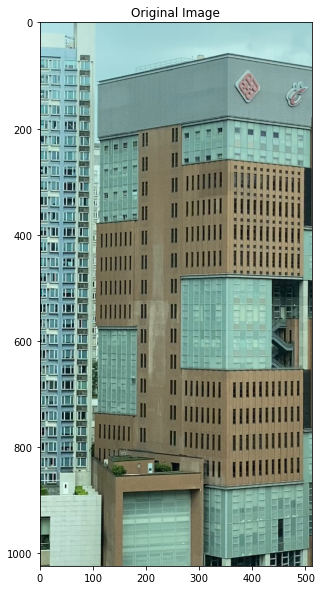

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(Image.open('G:/Test_dataset/HR/018_00000.png'))
ax.title.set_text("Original Image")
plt.show()

In [26]:
# Make output directory
# try:
#     os.listdir('G:.Test_dataset/LR/downscale_4/output')
# except:
#     os.makedirs('G:.Test_dataset/LR/downscale_4/output')
target = cv2.imread('G:/Test_dataset/HR/0002.jpg', cv2.IMREAD_COLOR)
target = cv2.cvtColor(target, cv2.COLOR_BGR2YCrCb)
target = target[:, :, 0]
shape = target.shape
Y_img = cv2.imread('G:/Test_dataset/LR/downscale_4/0002.png', cv2.IMREAD_COLOR)
Y_img = cv2.resize(Y_img, (shape[1], shape[0]), interpolation=cv2.INTER_CUBIC)
print(Y_img.shape)

cv2.imwrite('G:/Test_dataset/LR/0002_downscale_4_acnet.png', Y_img)

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(Image.open('G:/Test_dataset/LR/0002_downscale_4_acnet.png'))
ax.title.set_text("Distorted Image")
plt.show()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


(900, 1200, 3)


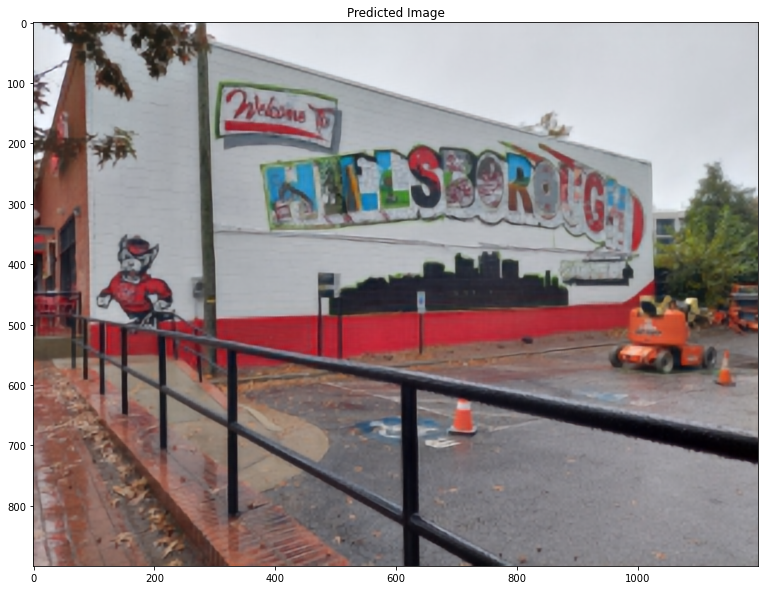

In [28]:
Y_img = cv2.imread('G:/Test_dataset/LR/downscale_4/0010.jpg', cv2.IMREAD_COLOR)
Y = np.zeros((1, Y_img.shape[0], Y_img.shape[1], Y_img.shape[2]), dtype=np.float32)

Y[0, :, :, :] = Y_img.astype(np.float32) /255.

# Predict
acnet_model.load_weights('G:/acnet/model.h5')
pre = acnet_model.predict(Y, batch_size=1) * 255.
# Post process output
pre[pre[:] > 255] = 255
pre[pre[:] < 0] = 0
pre = pre.astype(np.uint8)


output = np.copy(pre[0])
print(output.shape)
# Save image
cv2.imwrite('G:/Test_dataset/output/0010_acnet.png', output)

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(Image.open('G:/Test_dataset/output/0010_acnet.png'))
ax.title.set_text("Predicted Image")
plt.show()

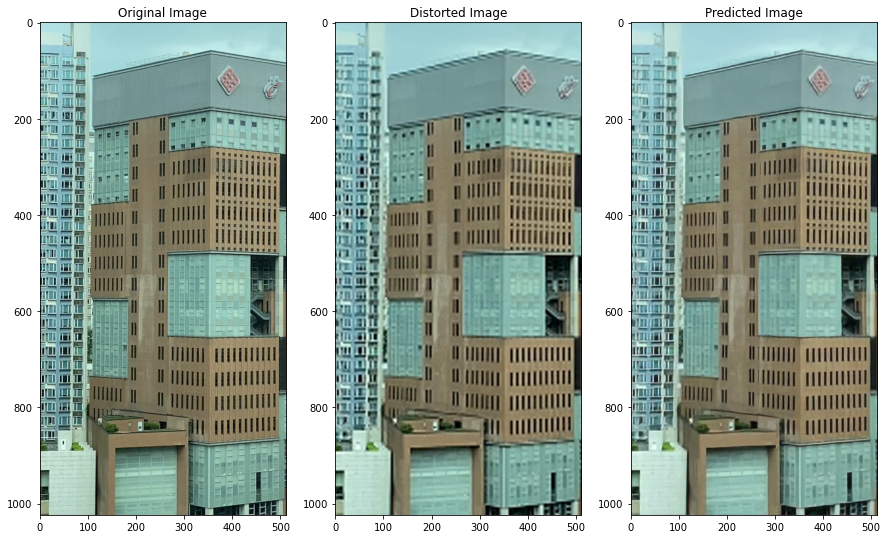

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(Image.open('G:/Test_dataset/HR/018_00000.png'))
ax[0].title.set_text("Original Image")

ax[1].imshow(Image.open('G:/Test_dataset/LR/018_00000_downscale_4_acnet.png'))
ax[1].title.set_text("Distorted Image")

ax[2].imshow(Image.open('G:/Test_dataset/output/018_00000_acnet.png'))
ax[2].title.set_text("Predicted Image")

In [18]:
from skimage.metrics import structural_similarity as ssim

def psnr(target, ref):
    # Assume target is RGB/BGR image
    target_data = target.astype(float)
    ref_data = ref.astype(float)
    
    diff = ref_data - target_data
    diff = diff.flatten('C')
    
    rmse = np.sqrt(np.mean(diff ** 2.))
    
    return 20 * np.log10(np.max(ref_data) / rmse)

def mse(target, ref):
    target_data = target.astype(float)
    ref_data = ref.astype(float)
    err = np.sum((target_data - ref_data) ** 2)
    
    err /= float(target_data.shape[0] * target_data.shape[1])
    return err

def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel=True))
    return scores

In [19]:
# Calculate AVG Predict result
acnet_model.load_weights('G:/acnet/model.h5')
metrices = []

prediction = acnet_model.predict(X_test, batch_size = 1) * 255.

print(prediction.shape)
for i in range(len(prediction)):
    pre = prediction[i]
    # Post process output
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    output = pre.astype(np.uint8)
    
    y_test[i] = y_test[i] * 255.
    origin = y_test[i].astype(np.uint8)
    #calculate the metrices       
    metrices.append(compare_images(output, origin))
metrices = np.array(metrices, dtype=np.float32)
print(metrices.shape)

metrices_avg = np.mean(metrices, axis=0)
print(metrices_avg.shape)
print("Metrics for original and predicted image")
print("PSNR: {}".format(metrices_avg[0]))
print("MSE: {}".format(metrices_avg[1]))
print("SSIM: {}".format(metrices_avg[2]))

(150, 1024, 512, 3)
(150, 3)
(3,)
Metrics for original and predicted image
PSNR: 22.24357032775879
MSE: 1540.409423828125
SSIM: 0.6725026369094849


In [20]:
with h5py.File('G:/Test_dataset/test_downscale_4.h5', 'r') as h:
    X_test = np.array(h.get('data'))
    y_test = np.array(h.get('label'))
    
shape = y_test.shape

bicubic_metric = []

for i in range(len(X_test)):
    dis = X_test[i] * 255.
    dis = dis.astype(np.uint8)
    distortion = cv2.resize(dis, (shape[2], shape[1]), interpolation=cv2.INTER_CUBIC)
    origin = y_test[i] * 255.
    origin = origin.astype(np.uint8)
    bicubic_metric.append(compare_images(distortion, origin))
    
bicubic_metric = np.array(bicubic_metric, dtype=np.float32)
bicubic_avg = np.mean(bicubic_metric, axis=0)
print(bicubic_avg.shape)
print("Metrics for original and distorted image")
print("PSNR: {}".format(bicubic_avg[0]))
print("MSE: {}".format(bicubic_avg[1]))
print("SSIM: {}".format(bicubic_avg[2]))

(3,)
Metrics for original and distorted image
PSNR: 21.721128463745117
MSE: 1473.5177001953125
SSIM: 0.646841824054718


In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import PIL
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array


def plot_results(img, prefix, title):
  "Plot the result with zoom-in area."
  img_array = img_to_array(img)
  img_array = img_array.astype("float32") / 255.0

  # Create a new figure with a default 111 subplot.
  fig, ax = plt.subplots()
  im = ax.imshow(img_array[::-1], origin="lower")

  plt.title(title)
  # zoom-factor: 2.0, location: upper-left
  axins = zoomed_inset_axes(ax, 2, loc=2)
  axins.imshow(img_array[::-1], origin="lower")

  # Specify the limits.
  x1, x2, y1, y2 = 200, 300, 100, 200
  # Apply the x-limits.
  axins.set_xlim(x1, x2)
  # Apply the y-limits.
  axins.set_ylim(y1, y2)

  plt.yticks(visible=False)
  plt.xticks(visible=False)

  # Make the line.
  mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="blue")
  plt.savefig(str(prefix) + "-" + title + ".png")
  plt.show()


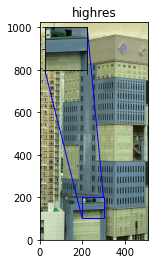

In [24]:
index=1
highres_img = cv2.imread('G:/Test_dataset/HR/018_00000.png')
plot_results(highres_img, index, "highres")